This notebook is to analyze the 2800.HK stock price.

Firstly, we will import the 2800.HK stock price by using yahoo finance API.

In [1]:
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

ticker = "2800.HK"
df = si.get_data(ticker)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


The API will return a Panda DataFrame, which includes 6 columns and has 3647 rows totally. 
From the description of the DataFrame, we can see that the stock close prices are between 11.5 to 33.3 and some other useful information such as average value of the stock prices, standard deviation, and so on.

In [2]:
df.describe()

,open,high,low,close,adjclose,volume
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3.647000e+03
mean,23.649889,23.883916,23.571206,23.733905,23.733905,5.111975e+07
std,4.041164,3.719725,3.691977,3.705117,3.705117,5.746497e+07
min,0.000000,11.510000,11.510000,11.510000,11.510000,0.000000e+00
25%,21.450001,21.600000,21.345000,21.459999,21.459999,1.339431e+07
50%,23.500000,23.650000,23.400000,23.500000,23.500000,3.320692e+07
75%,26.299999,26.415000,26.100000,26.270000,26.270000,6.959140e+07
max,33.500000,33.750000,33.150002,33.349998,33.349998,9.593655e+08


We can see there are not null in all the column, which is great.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2008-01-02 to 2022-10-13
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      3647 non-null   float64
 1   high      3647 non-null   float64
 2   low       3647 non-null   float64
 3   close     3647 non-null   float64
 4   adjclose  3647 non-null   float64
 5   volume    3647 non-null   float64
 6   ticker    3651 non-null   object 
dtypes: float64(6), object(1)
memory usage: 228.2+ KB


To be simple, we just use 1000 records to draw some useful diagrams.

In [4]:
df = df.tail(1000)

Here is the closing price diagram.

<AxesSubplot: title={'center': '2800.HK close price'}, xlabel='year', ylabel='price'>

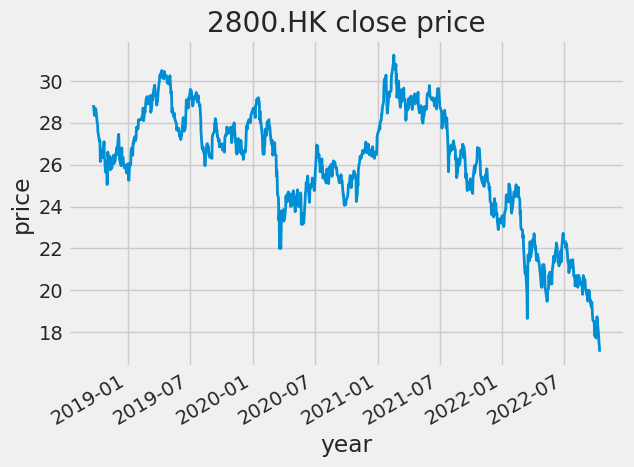

In [9]:
plt.title("2800.HK close price")
plt.xlabel("year")
plt.ylabel("price")
df['close'].plot(linewidth=2.0)

Here is the moving average analysis. We take moving average for 10 days, 20 days, and 50 days for example.

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['close'].rolling(ma).mean()

<AxesSubplot: >

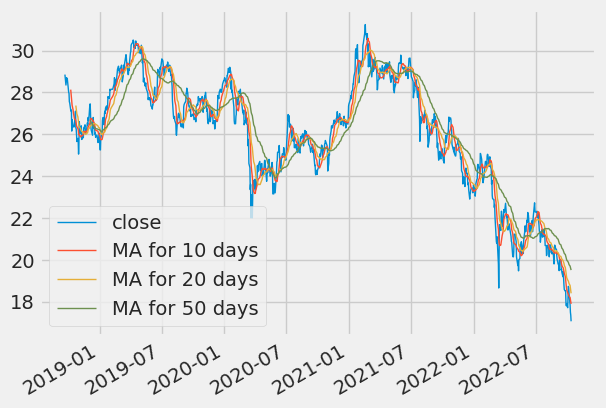

In [7]:
df[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(linewidth=1.0)

Here is the daily return of this stock.

<AxesSubplot: >

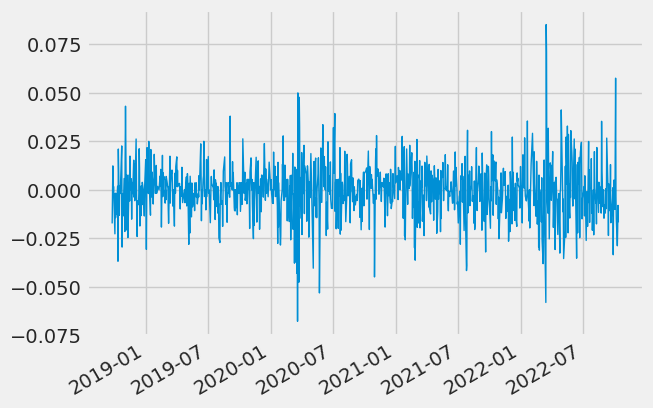

In [8]:
df['Daily Return'] = df['close'].pct_change()
df['Daily Return'].plot(linewidth=1.0)

Here is the histogram of daily return of this stock.

<AxesSubplot: >

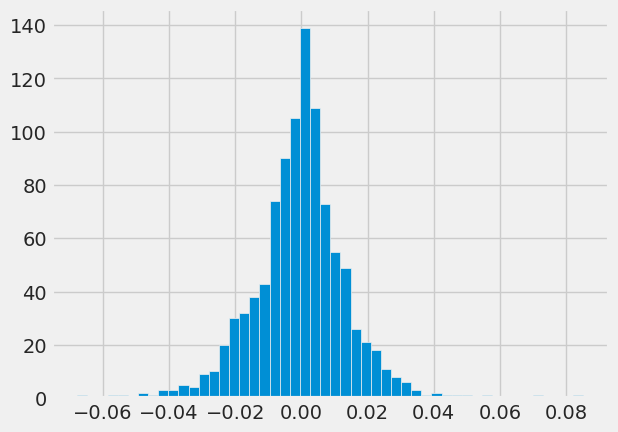

In [10]:
df['Daily Return'].hist(bins=50)